In [26]:
from __future__ import print_function
import os
import sys
import pandas as pd
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 2. Check that an environmental variable PUIDATA exists and that it points to the PUIdata directory

In [27]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/vvt221/PUIdata


In [36]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > waterconsumptiondata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   5559      0 --:--:-- --:--:-- --:--:--  5588


In [37]:
!mv waterconsumptiondata.csv $PUIDATA

In [38]:
!ls $PUIDATA

hivdata.csv  waterconsumptiondata.csv  waterdata.csv


In [39]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/vvt221/PUIdata


### 3. Display the top 7 rows of the DF 

In [42]:
water_consumption_df = pd.read_csv("%s/waterconsumptiondata.csv"%os.getenv("PUIDATA"))
water_consumption_df.head(7)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


### 4. Remove all but 2 numerical values columns

In [47]:
wc_subset=water_consumption_df[['New York City Population','NYC Consumption(Million gallons per day)']]


### 5. Display the reducted dataframe. 

In [66]:
wc_subset.head(7)

,New York City Population,NYC Consumption(Million gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0
5,7234514.0,1465.0
6,7274054.0,1326.0


In [67]:
wc_subset.rename(columns = {'New York City Population':'NYC Population', 
               'NYC Consumption(Million gallons per day)':'NYC Water Consumption (Million Gallons per day)'}, inplace=True)
wc_subset.head(7)

,NYC Population,NYC Water Consumption (Million Gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0
5,7234514.0,1465.0
6,7274054.0,1326.0


### 6. Plot the columns one against the other in a scatter plot using the datafraome plot method

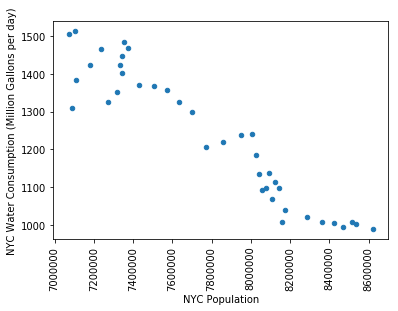

In [70]:
wc_subset.plot.scatter(x='NYC Population',y='NYC Water Consumption (Million Gallons per day)',rot=90)

#### Figure 1: Scatterplot depicting NYC Water Consumption(Miion Galloons per day) against the NYC population.The water consumption appears to decrease with an increase in the population.

### Extra Credit Assignment: Extract the same dataset data using the NYC Open Data API (SODA API)

In [48]:
url= "https://data.cityofnewyork.us/resource/waf7-5gvc.json"
wca_df = pd.read_json(url)


### Read that file in and show the first 8 rows

In [50]:
wca_df.head(8)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986


### Repeat the steps above 1-7 with a CSV file that contains a date/time column and a numerical value. If the dataset you chose has a date column plot each of the axes you had chosen above against that column.

In [54]:
wca_subset=wca_df[['new_york_city_population','year']]

wca_subset.rename(columns = {'new_york_city_population':'NYC Population', 
               'year':'Year'}, inplace=True)
wca_subset.head(7)



,NYC Population,Year
0,7102100.0,1979
1,7071639.0,1980
2,7089241.0,1981
3,7109105.0,1982
4,7181224.0,1983
5,7234514.0,1984
6,7274054.0,1985


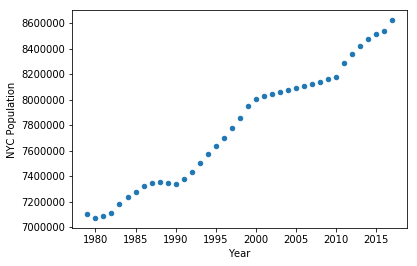

In [56]:

wca_subset.plot.scatter(x='Year',y='NYC Population')


##### Figure 2: Scatterplot depicting NYC Population against the years .Population of New York City increases steathily with each passing year through 1979to 2017.


In [58]:
wca_subset2=wca_df[['nyc_consumption_million_gallons_per_day','year']]

wca_subset2.rename(columns = {'nyc_consumption_million_gallons_per_day':'NYC Consumption (million gallons per day)', 
               'year':'Year'}, inplace=True)
wca_subset2.head(7)


,NYC Consumption (million gallons per day),Year
0,1512.0,1979
1,1506.0,1980
2,1309.0,1981
3,1382.0,1982
4,1424.0,1983
5,1465.0,1984
6,1326.0,1985


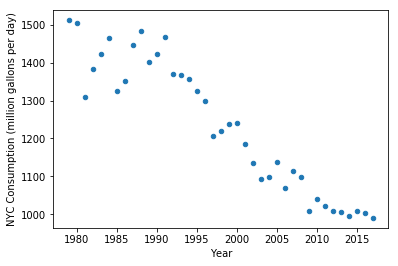

In [59]:
wca_subset2.plot.scatter(x='Year',y='NYC Consumption (million gallons per day)')


##### Figure 3 : Scatterplot depicting NYC Population against the years. Water consumption per day  in the order of millions of gallons displays a decrease with each passing year from 1979 to 2017